In [7]:

from models.modeling_chclip import DoubleCLIP,CHCLIPProcess
from transformers import AutoTokenizer,AutoProcessor,AutoModel
tok = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch16")

model = DoubleCLIP.from_pretrained("/home/chenzhongzhi/ckpt/invert_clandmse_cc3muc2_xlmBase_basep16_bs256_wd1e-1_lr1e-4_ep10_ws1000_doubleclip_6lgs_300k")

processor = CHCLIPProcess.from_pretrained("/home/chenzhongzhi/ckpt/invert_clandmse_cc3muc2_xlmBase_basep16_bs256_wd1e-1_lr1e-4_ep10_ws1000_doubleclip_6lgs_300k")
clip = AutoModel.from_pretrained("openai/clip-vit-base-patch16")


Some weights of the model checkpoint at xlm-roberta-base were not used when initializing RobertaSeriesModelWithTransformation: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaSeriesModelWithTransformation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaSeriesModelWithTransformation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaSeriesModelWithTransformation were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['pre_LN.bias', 'transformation.weight', 'transformation.bias', 'pre_LN.we

In [82]:
import torch.nn as nn
texts = ['一个人坐在沙滩上']
text = processor(text=texts,return_tensors='pt')
outputs = model.get_text_features(**text)
weight = nn.Parameter(clip.text_model.embeddings.token_embedding.weight)
word_embeddings = nn.Linear(in_features=512,out_features=49408,bias=False)
word_embeddings.weight = weight
logits_scores = word_embeddings(outputs[1])
input_ids = logits_scores.argmax(-1)
print(input_ids)
print(tok.convert_ids_to_tokens(input_ids.tolist()[0]))
texts = ['a man sitting on the beach.']
text = tok(text=texts,return_tensors='pt') 
print(text['input_ids'])
clip_outputs = clip.get_text_features(**text)
clip_outputs = clip_outputs / clip_outputs.norm(p=2, dim=-1, keepdim=True)
mimic_outputs = outputs[0] / outputs[0].norm(p=2, dim=-1, keepdim=True)
clip_outputs @ mimic_outputs.T

tensor([[26755, 49406, 23560,  2615,  2615,  8958, 25965, 41558]])
['econ', '<|startoftext|>', 'naples</w>', 'rently</w>', 'rently</w>', 'drake</w>', 'ugand', '.\'"</w>']
tensor([[49406,   320,   786,  4919,   525,   518,  2117,   269, 49407]])


tensor([[0.9745]], grad_fn=<MmBackward0>)

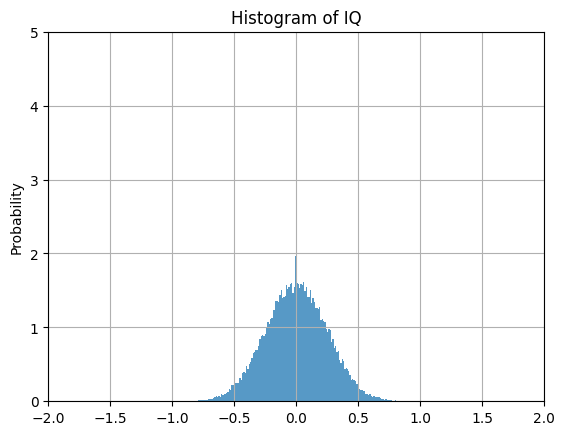

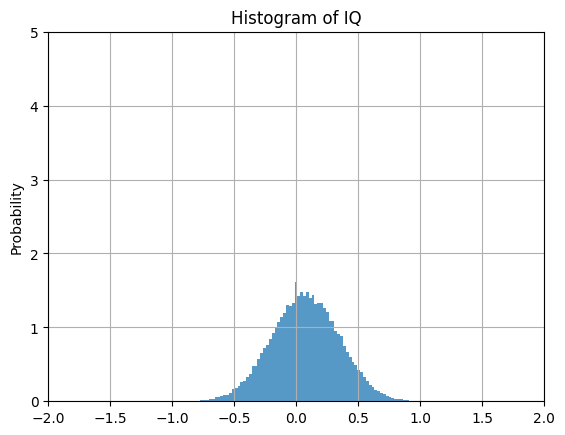

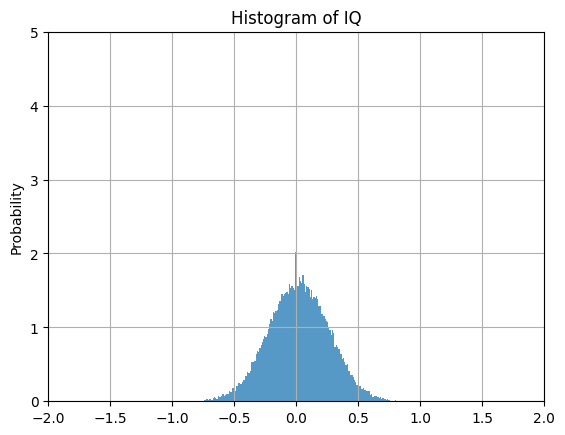

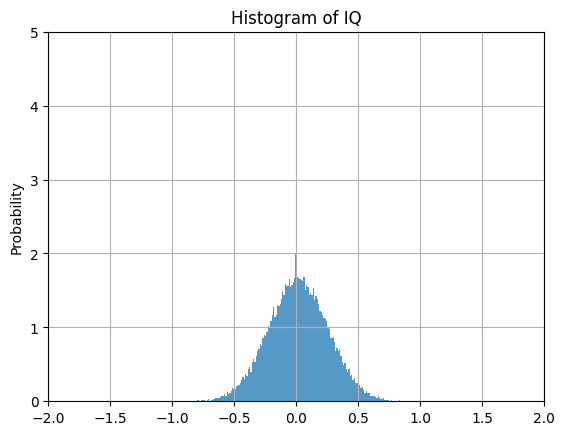

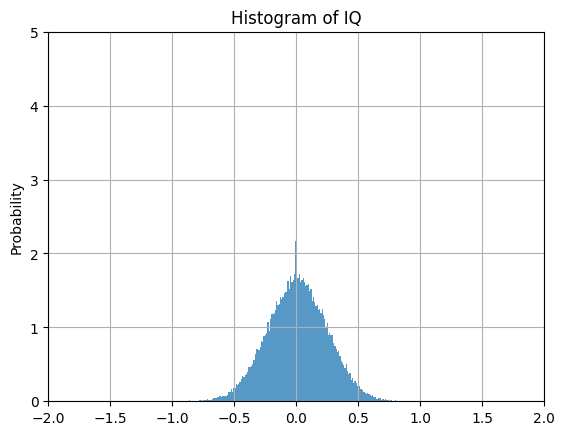

In [124]:
for i in range(0,5):
    x=logits_scores[0,i].detach().numpy()
    import matplotlib.pyplot as plt
    # pyplot.
    # mu, sigma = 100, 15
    # x = mu + sigma * np.random.randn(10000)

    # the histogram of the data
    n, bins, patches = plt.hist(x,bins=200, density=True,alpha=0.75)


    plt.ylabel('Probability')
    plt.title('Histogram of IQ')
    plt.axis([-2, 2, 0, 5])
    plt.grid(True)
    plt.show()

In [61]:
mimic_ids = logits_scores.argmax(-1)
print(mimic_ids)
clip_outputs = clip.get_text_features(mimic_ids)
clip_outputs = clip_outputs / clip_outputs.norm(p=2, dim=-1, keepdim=True)
clip_outputs @ mimic_outputs.T

tensor([[26755, 49134, 49406, 23560, 41558]])


tensor([[0.6537]], grad_fn=<MmBackward0>)